In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
place1 = 'Emmeloord'  # 'Den_Helder' or 'Medemblik' or 'Amsterdam'
place2 = 'Den_Helder'

filename1 = 'data_' + place1 + '_array.json' 
filename2 = 'data_' + place2 + '_array.json' 

file1 = open('C:/Users/Matej/ijs/PerceptiveSentinel/Utilities/DarkSkyGrabber/data/' + filename1,'r')
file2 = open('C:/Users/Matej/ijs/PerceptiveSentinel/Utilities/DarkSkyGrabber/data/' + filename2,'r')

json_text1 = file1.read()
json_text2 = file2.read()

file1.close()
file2.close()

In [3]:
data_list1 = json.JSONDecoder().decode(json_text1)
data_list2 = json.JSONDecoder().decode(json_text2)

In [4]:
df1 = pd.DataFrame(data_list1);
df2 = pd.DataFrame(data_list2);

pd.set_option('display.max_columns', 500)

In [5]:
df2[:5]

,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,apparentTemperatureMax,apparentTemperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,cloudCover,cloudCoverError,dewPoint,humidity,icon,moonPhase,ozone,precipAccumulation,precipIntensity,precipIntensityError,precipIntensityMax,precipIntensityMaxError,precipIntensityMaxTime,precipProbability,precipType,pressure,pressureError,summary,sunriseTime,sunsetTime,temperatureHigh,temperatureHighError,temperatureHighTime,temperatureLow,temperatureLowError,temperatureLowTime,temperatureMax,temperatureMaxError,temperatureMaxTime,temperatureMin,temperatureMinError,temperatureMinTime,time,uvIndex,uvIndexTime,visibility,windBearing,windGust,windGustTime,windSpeed
0,7.69,1451649600,0.37,1451718000,7.69,1451649600,1.38,1451674800,0.66,NaN,4.49,0.88,partly-cloudy-day,0.73,NaN,NaN,0.0025,NaN,0.0330,NaN,1.451610e+09,0.18,rain,1021.56,NaN,Mostly cloudy throughout the day.,1451634915,1451662532,8.29,NaN,1451649600,4.91,NaN,1451718000,8.29,NaN,1451649600,3.56,NaN,1451638800,1451602800,NaN,NaN,9.03,154,7.80,1.451606e+09,1.46
1,1.02,1451757600,-0.01,1451782800,1.47,1451692800,0.27,1451772000,0.84,NaN,3.97,0.93,partly-cloudy-day,0.76,NaN,NaN,0.0432,NaN,0.3200,NaN,1.451732e+09,0.63,rain,1009.60,NaN,Mostly cloudy throughout the day.,1451721306,1451748996,5.13,NaN,1451754000,4.82,NaN,1451790000,5.26,NaN,1451689200,4.79,NaN,1451732400,1451689200,NaN,NaN,8.03,119,9.63,1.451768e+09,6.38
2,4.48,1451826000,-0.31,1451887200,4.48,1451826000,-0.01,1451782800,0.64,NaN,5.15,0.94,rain,0.79,NaN,NaN,0.3378,NaN,1.3335,NaN,1.451812e+09,0.96,rain,999.27,NaN,Light rain in the morning.,1451807693,1451835464,7.32,NaN,1451811600,3.93,NaN,1451890800,7.32,NaN,1451811600,4.82,NaN,1451790000,1451775600,NaN,NaN,6.63,132,12.20,1.451794e+09,6.15
3,0.07,1451890800,-3.12,1451937600,0.76,1451869200,-3.12,1451937600,0.73,NaN,2.77,0.96,fog,0.82,NaN,NaN,0.2438,NaN,0.8992,NaN,1.451884e+09,0.90,rain,987.97,NaN,Foggy starting in the afternoon.,1451894077,1451921934,4.01,NaN,1451887200,1.89,NaN,1451937600,5.14,NaN,1451862000,1.89,NaN,1451937600,1451862000,NaN,NaN,4.41,118,9.79,1.451862e+09,5.61
4,1.75,1451991600,-5.51,1452052800,1.75,1451991600,-4.37,1452031200,0.74,NaN,2.68,0.97,fog,0.85,NaN,NaN,0.0660,NaN,0.5385,NaN,1.451948e+09,0.88,rain,990.91,NaN,Foggy throughout the day.,1451980457,1452008407,4.68,NaN,1451991600,-0.60,NaN,1452063600,4.68,NaN,1451991600,0.81,NaN,1452031200,1451948400,NaN,NaN,2.75,111,8.00,1.452028e+09,4.64


In [6]:
df1 = pd.DataFrame(data_list1);
df2 = pd.DataFrame(data_list2);

data_list = [
        'cloudCover',
        #'dewPoint',
        'humidity',
        'precipIntensity',
        'precipIntensityMax',
        'precipProbability',
        'pressure',
        'temperatureHigh',
        'temperatureLow',
        'windSpeed'
        ]

df1['time'] = pd.to_datetime(df1['time'] + 2*60*60,unit='s').dt.round('1d');
df_1 = df1.set_index('time').loc[:, data_list]

df2['time'] = pd.to_datetime(df2['time'] + 2*60*60,unit='s').dt.round('1d');
df_2 = df2.set_index('time').loc[:, data_list]

In [7]:
df_1 = df1.set_index('time').loc[:, data_list]

In [8]:
df_1-df_2

,cloudCover,humidity,precipIntensity,precipIntensityMax,precipProbability,pressure,temperatureHigh,temperatureLow,windSpeed
time,,,,,,,,,
2016-01-01,-0.21,0.04,-0.0025,-0.0127,-0.18,0.70,-0.78,-1.04,0.03
2016-01-02,-0.01,-0.01,-0.0051,-0.1981,0.11,0.92,-0.78,-2.18,-2.03
2016-01-03,0.35,0.01,-0.1397,-0.7544,0.04,1.68,-1.63,-2.66,-1.81
2016-01-04,0.26,-0.01,-0.1168,-0.5233,0.03,0.82,-2.20,-2.88,-1.62
2016-01-05,0.17,-0.01,-0.0406,-0.4140,-0.42,0.72,-3.29,-1.82,-1.50
2016-01-06,0.17,-0.01,-0.0203,-0.0990,-0.65,0.25,-2.06,-2.22,-1.33
2016-01-07,-0.03,0.00,-0.0305,0.0254,0.04,1.44,-2.69,-1.63,-0.92
2016-01-08,-0.08,0.05,-0.0457,-0.6934,0.48,1.55,-1.26,-1.20,-2.23
2016-01-09,-0.11,-0.02,0.0051,0.0914,0.57,1.63,-0.37,-1.34,-1.24


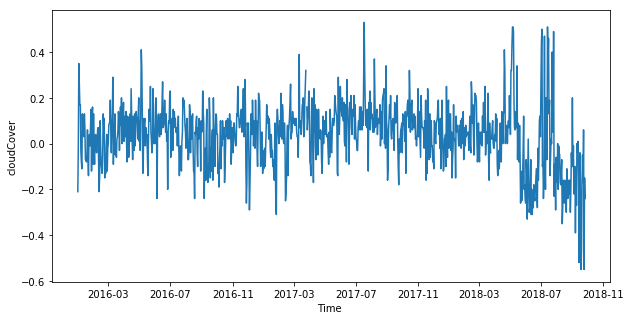

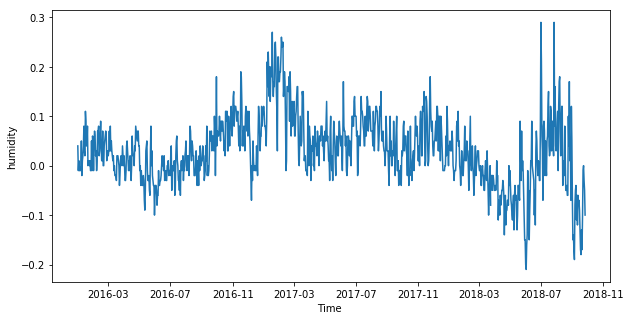

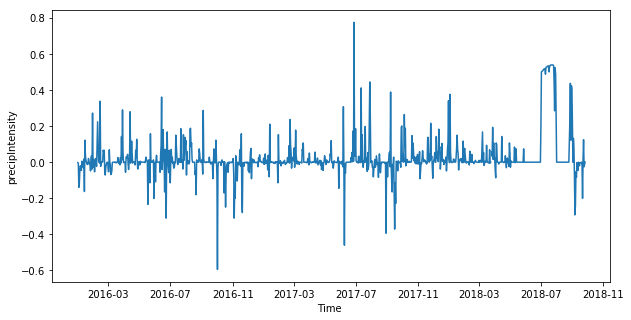

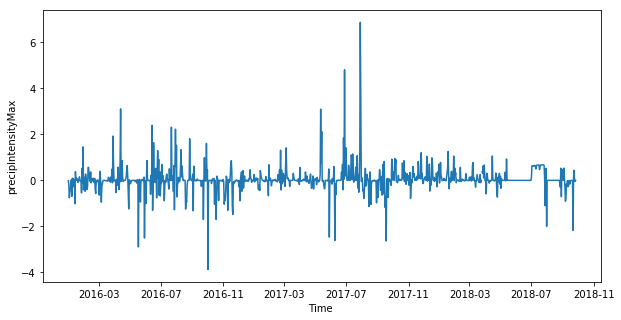

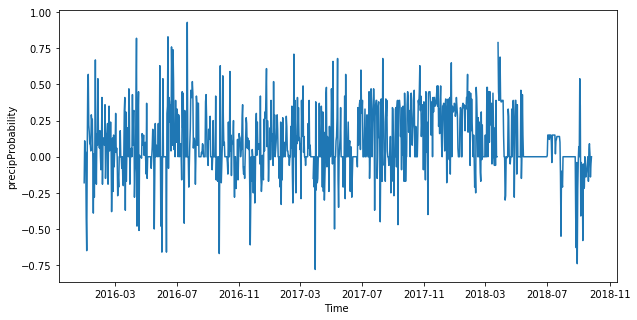

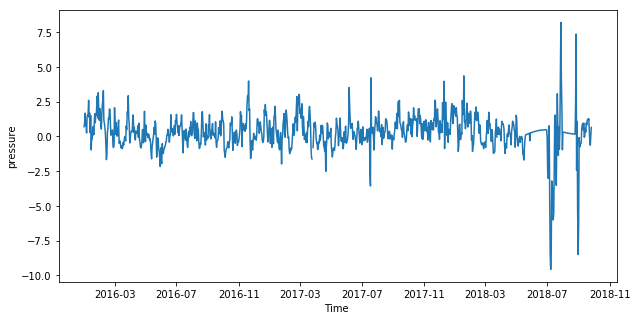

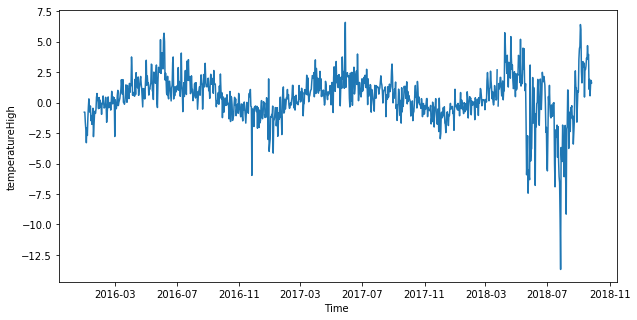

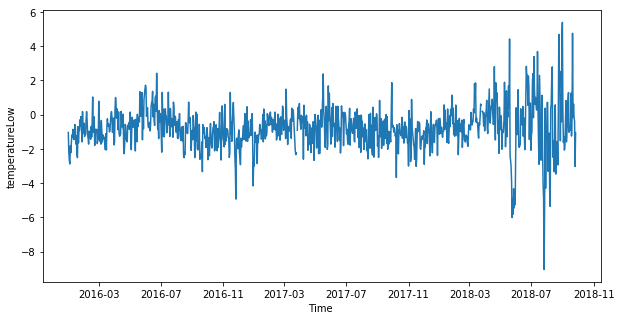

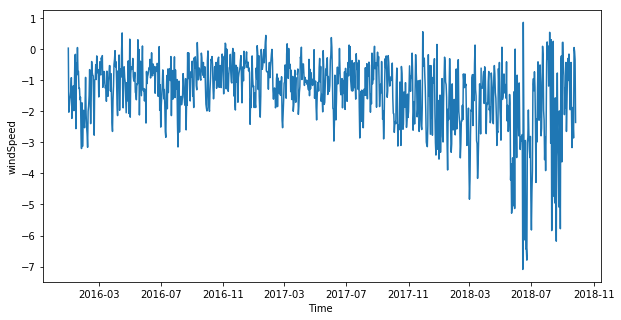

In [9]:
#razlike
for i in data_list:
    fig, ax = plt.subplots();
    fig.set_size_inches(10, 5)
    ax.plot((df_1-df_2).index, (df_1-df_2)[i])
    
    plt.xlabel('Time ')
    plt.ylabel(i)
    plt.show();

In [10]:
for data in data_list:
    x = df_1[data].corr(df_2[data])
    print(data + ': ' + str(x))

cloudCover: 0.7524733991558994
humidity: 0.6747631418447539
precipIntensity: 0.7631783483212808
precipIntensityMax: 0.7027510183657472
precipProbability: 0.8357742177820906
pressure: 0.9923704413380962
temperatureHigh: 0.9668450851325505
temperatureLow: 0.9778290656515337
windSpeed: 0.860706797765639
